In [26]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as per

In [27]:
#importing datasets
data1=pd.read_csv("kidney.csv")
data1

,age,bp,sg,al,bgr,sc,hemo,htn,dm,ane,classification
0,48.0,80.0,1.020,1.0,121.0,1.2,15.4,1.0,1.0,0.0,1
1,7.0,50.0,1.020,4.0,121.0,0.8,11.3,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,423.0,1.8,9.6,0.0,1.0,1.0,1
3,48.0,70.0,1.005,4.0,117.0,3.8,11.2,1.0,0.0,1.0,1
4,51.0,80.0,1.010,2.0,106.0,1.4,11.6,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
388,55.0,80.0,1.020,0.0,140.0,0.5,15.7,0.0,0.0,0.0,0
389,42.0,70.0,1.025,0.0,75.0,1.2,16.5,0.0,0.0,0.0,0
390,12.0,80.0,1.020,0.0,100.0,0.6,15.8,0.0,0.0,0.0,0
391,17.0,60.0,1.025,0.0,114.0,1.0,14.2,0.0,0.0,0.0,0


In [28]:
data1['classification'].value_counts()

classification
1    243
0    150
Name: count, dtype: int64

In [29]:
data=data1

In [30]:
data.count()

age               393
bp                393
sg                393
al                393
bgr               393
sc                393
hemo              393
htn               393
dm                393
ane               393
classification    393
dtype: int64

In [31]:
X=data.drop('classification',axis=1)
y=data['classification']

In [7]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [34]:
# Begin by importing all necessary libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
print(X_train)
print(y_train)

      age    bp     sg   al    bgr    sc  hemo  htn   dm  ane
329  25.0  60.0  1.020  0.0  119.0   0.5  15.2  0.0  0.0  0.0
182   3.0  80.0  1.010  2.0  121.0   0.7  10.7  0.0  0.0  0.0
172  65.0  80.0  1.015  2.0  215.0   2.5  13.2  0.0  1.0  0.0
63   55.0  80.0  1.010  0.0  146.0   1.2   9.8  0.0  0.0  0.0
341  38.0  80.0  1.020  0.0   99.0   0.5  13.6  0.0  0.0  0.0
..    ...   ...    ...  ...    ...   ...   ...  ...  ...  ...
71   64.0  90.0  1.010  3.0  121.0   1.3  10.3  1.0  1.0  0.0
106  54.0  70.0  1.020  0.0  233.0   1.9  11.7  0.0  1.0  0.0
270  46.0  60.0  1.025  0.0  123.0   1.0  15.7  0.0  0.0  0.0
348  23.0  60.0  1.020  0.0   95.0   0.8  15.0  0.0  0.0  0.0
102  65.0  80.0  1.015  0.0  115.0  11.5  14.1  0.0  0.0  0.0

[314 rows x 10 columns]
329    0
182    1
172    1
63     1
341    0
      ..
71     1
106    1
270    0
348    0
102    1
Name: classification, Length: 314, dtype: int64


In [12]:
from sklearn import svm

In [13]:
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
#KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model = svm.SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

In [14]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(SVC_prediction, y_test))

0.7341772151898734
[[22 19]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.92      0.54      0.68        41
           1       0.65      0.95      0.77        38

    accuracy                           0.73        79
   macro avg       0.79      0.74      0.73        79
weighted avg       0.79      0.73      0.72        79



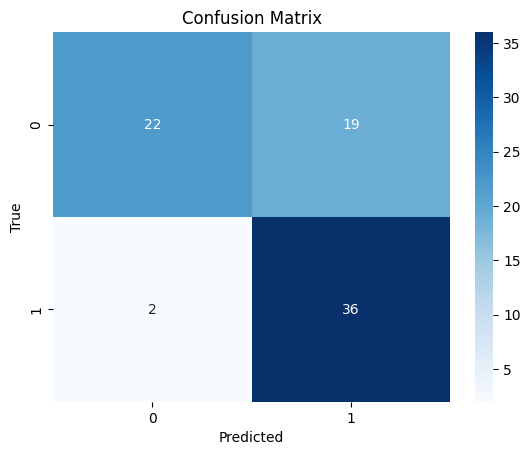

In [15]:
import seaborn as sns
conf_matrix = confusion_matrix(SVC_prediction,y_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
def predict_custom_input(features):
    input_df = pd.DataFrame([features], columns=X.columns)
    prediction = SVC_model.predict(input_df)
    return prediction[0]  



#custom_input = [63,70,1.01,3,380,2.7,10.8,1,1,0]
custom_input = [63,70,1.01,3,380,2.7,10.8,1,1,0]  


predicted_class = predict_custom_input(custom_input)
if predicted_class==0:
    print("No Disease")
else:
    print("Disease")

Disease


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize KNN model (default neighbors = 6)
KNN_model = KNeighborsClassifier(n_neighbors=6)

# Train the model
KNN_model.fit(X_train, y_train)

# Make predictions
KNN_predictions = KNN_model.predict(X_test)

# Evaluate the model
print("KNN Model Performance:")

# Accuracy
knn_accuracy = accuracy_score(y_test, KNN_predictions)
print(f"Accuracy: {knn_accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, KNN_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, KNN_predictions))

KNN Model Performance:
Accuracy: 0.7721518987341772
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        24
           1       0.95      0.71      0.81        55

    accuracy                           0.77        79
   macro avg       0.77      0.81      0.76        79
weighted avg       0.84      0.77      0.78        79

Confusion Matrix:
[[22  2]
 [16 39]]


In [18]:
def predict_custom_input(features):
    input_df = pd.DataFrame([features], columns=X.columns)
    prediction = KNN_model.predict(input_df)
    return prediction[0]  



#custom_input = [63,70,1.01,3,380,2.7,10.8,1,1,0]
custom_input = [63,70,1.01,3,380,2.7,10.8,1,1,0]  # same example as before


predicted_class = predict_custom_input(custom_input)
if predicted_class==0:
    print("No Disease")
else:
    print("Disease")

Disease


In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
XGB_model = XGBClassifier()

# Train the model
XGB_model.fit(X_train, y_train)

# Make predictions
XGB_predictions = XGB_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Performance:")

# Accuracy
xgb_accuracy = accuracy_score(y_test, XGB_predictions)
print(f"Accuracy: {xgb_accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, XGB_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, XGB_predictions))

XGBoost Classifier Performance:
Accuracy: 0.9746835443037974
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.98      0.98      0.98        55

    accuracy                           0.97        79
   macro avg       0.97      0.97      0.97        79
weighted avg       0.97      0.97      0.97        79

Confusion Matrix:
[[23  1]
 [ 1 54]]


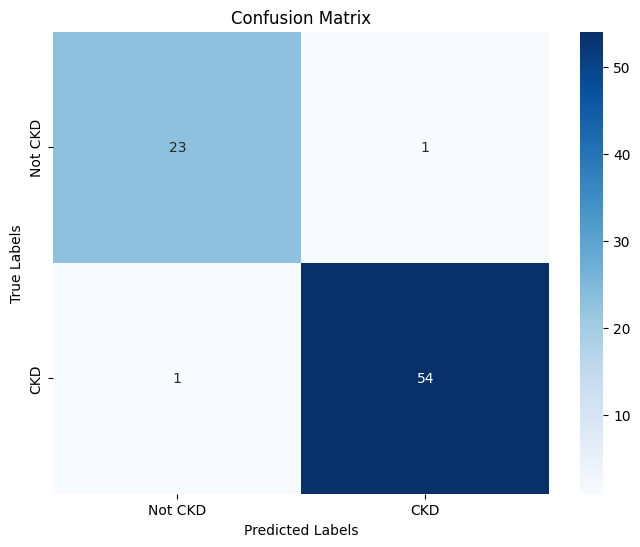

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, XGB_predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 3, 5]
}

# Initialize model
xgb = XGBClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 3, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Best Accuracy: 0.9936507936507937


In [39]:
best_params = random_search.best_params_

# Train XGBoost with best parameters
xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = xgb_tuned.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.9746835443037974


In [40]:
def predict_custom_input(features):
    input_df = pd.DataFrame([features], columns=X.columns)
    prediction = XGB_model.predict(input_df)
    return prediction[0]  



#custom_input = [63,70,1.01,3,380,2.7,10.8,1,1,0]
custom_input = [63,70,1.01,3,380,2.7,10.8,1,1,0]  # same example as before


predicted_class = predict_custom_input(custom_input)
if predicted_class==0:
    print("No Disease")
else:
    print("Disease")

Disease


In [41]:
import pickle
pickle.dump(XGB_model, open('kidney.pkl', 'wb'))

In [ ]:
# Thank you!